In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import io
import matplotlib as plot


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#import the file and uploaded it
from google.colab import files
uploaded = files.upload()
train_df = pd.read_csv(io.BytesIO(uploaded['Bank_Personal_Loan_Modelling.csv']))

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling.csv


In [3]:
#by this we are checking if any null or missing value is there
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
#by this we are getting the summary of the data
train_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
train_df.isnull().head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
train_df.isnull().tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4999,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
train_df.abs()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1.0,25.0,1.0,49.0,91107.0,4.0,1.6,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2.0,45.0,19.0,34.0,90089.0,3.0,1.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3.0,39.0,15.0,11.0,94720.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,35.0,9.0,100.0,94112.0,1.0,2.7,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,35.0,8.0,45.0,91330.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996.0,29.0,3.0,40.0,92697.0,1.0,1.9,3.0,0.0,0.0,0.0,0.0,1.0,0.0
4996,4997.0,30.0,4.0,15.0,92037.0,4.0,0.4,1.0,85.0,0.0,0.0,0.0,1.0,0.0
4997,4998.0,63.0,39.0,24.0,93023.0,2.0,0.3,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,4999.0,65.0,40.0,49.0,90034.0,3.0,0.5,2.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
#we run this for replacing the negative values 
train_df.Experience.mask(train_df.Experience<0,train_df.Experience.median(),inplace=True)

In [9]:
train_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.327600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.253035,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,11.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
#this function retuens the number of dimensions of the dataframe
train_df.ndim

2

In [ ]:
#this function convert rows into columns and vice versa
train_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4960,4961,4962,4963,4964,4965,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
ID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,...,4961.0,4962.0,4963.0,4964.0,4965.0,4966.0,4967.0,4968.0,4969.0,4970.0,4971.0,4972.0,4973.0,4974.0,4975.0,4976.0,4977.0,4978.0,4979.0,4980.0,4981.0,4982.0,4983.0,4984.0,4985.0,4986.0,4987.0,4988.0,4989.0,4990.0,4991.0,4992.0,4993.0,4994.00,4995.0,4996.0,4997.0,4998.0,4999.0,5000.0
Age,25.0,45.0,39.0,35.0,35.0,37.0,53.0,50.0,35.0,34.0,65.0,29.0,48.0,59.0,67.0,60.0,38.0,42.0,46.0,55.0,56.0,57.0,29.0,44.0,36.0,43.0,40.0,46.0,56.0,38.0,59.0,40.0,53.0,30.0,31.0,48.0,59.0,51.0,42.0,38.0,...,58.0,39.0,46.0,32.0,53.0,29.0,41.0,41.0,58.0,45.0,37.0,58.0,58.0,31.0,59.0,38.0,29.0,40.0,57.0,50.0,29.0,34.0,36.0,51.0,27.0,48.0,32.0,48.0,34.0,24.0,55.0,51.0,30.0,45.00,64.0,29.0,30.0,63.0,65.0,28.0
Experience,1.0,19.0,15.0,9.0,8.0,13.0,27.0,24.0,10.0,9.0,39.0,5.0,23.0,32.0,41.0,30.0,14.0,18.0,21.0,28.0,31.0,27.0,5.0,18.0,11.0,19.0,16.0,20.0,30.0,13.0,35.0,16.0,28.0,6.0,5.0,24.0,35.0,25.0,18.0,13.0,...,28.0,14.0,20.0,6.0,27.0,5.0,17.0,16.0,32.0,19.0,13.0,28.0,32.0,1.0,33.0,11.0,5.0,15.0,27.0,26.0,5.0,9.0,10.0,26.0,1.0,23.0,6.0,23.0,8.0,0.0,25.0,25.0,5.0,21.00,40.0,3.0,4.0,39.0,40.0,4.0
Income,49.0,34.0,11.0,100.0,45.0,29.0,72.0,22.0,81.0,180.0,105.0,45.0,114.0,40.0,112.0,22.0,130.0,81.0,193.0,21.0,25.0,63.0,62.0,43.0,152.0,29.0,83.0,158.0,48.0,119.0,35.0,29.0,41.0,18.0,50.0,81.0,121.0,71.0,141.0,80.0,...,81.0,108.0,122.0,98.0,110.0,33.0,34.0,69.0,41.0,60.0,95.0,73.0,41.0,68.0,64.0,29.0,31.0,54.0,63.0,92.0,135.0,195.0,45.0,72.0,98.0,30.0,78.0,43.0,85.0,38.0,58.0,92.0,13.0,218.00,75.0,40.0,15.0,24.0,49.0,83.0
ZIP Code,91107.0,90089.0,94720.0,94112.0,91330.0,92121.0,91711.0,93943.0,90089.0,93023.0,94710.0,90277.0,93106.0,94920.0,91741.0,95054.0,95010.0,94305.0,91604.0,94720.0,94015.0,90095.0,90277.0,91320.0,95521.0,94305.0,95064.0,90064.0,94539.0,94104.0,93106.0,94117.0,94801.0,91330.0,94035.0,92647.0,94720.0,95814.0,94114.0,94115.0,...,91604.0,91401.0,90065.0,95054.0,90245.0,94709.0,91361.0,92697.0,93022.0,94143.0,95821.0,90024.0,93401.0,95045.0,92867.0,95207.0,95039.0,90266.0,90210.0,90740.0,95762.0,90266.0,95126.0,95370.0,94043.0,94720.0,95825.0,93943.0,95134.0,93555.0,95023.0,91330.0,90037.0,91801.00,94588.0,92697.0,92037.0,93023.0,90034.0,92612.0
Family,4.0,3.0,1.0,1.0,4.0,4.0,2.0,1.0,3.0,1.0,4.0,3.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,1.0,4.0,3.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,4.0,3.0,1.0,1.0,3.0,4.0,...,1.0,3.0,3.0,2.0,1.0,1.0,1.0,1.0,4.0,2.0,2.0,1.0,3.0,4.0,4.0,4.0,1.0,3.0,4.0,1.0,3.0,2.0,4.0,1.0,4.0,3.0,1.0,3.0,1.0,1.0,4.0,1.0,4.0,2.00,3.0,1.0,4.0,2.0,3.0,3.0
CCAvg,1.6,1.5,1.0,2.7,1.0,0.4,1.5,0.3,0.6,8.9,2.4,0.1,3.8,2.5,2.0,1.5,4.7,2.4,8.1,0.5,0.9,2.0,1.2,0.7,3.9,0.5,0.2,2.4,2.2,3.3,1.2,2.0,0.6,0.9,1.8,0.7,2.9,1.4,5.0,0.7,...,3.0,1.2,3.0,4.5,4.9,1.8,0.7,0.1,2.5,0.4,1.7,1.4,2.2,4.0,1.7,1.0,1.8,0.8,2.0,2.6,5.3,3.0,0.2,2.9,2.3,1.7,2.9,1.7,2.5,1.0,2.0,1.9,0.5,6.67,2.0,1.9,0.4,0.3,0.5,0.8
Education,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,3.0,2.0,3.0,2.0,1.0,3.0,3.0,1.0,3.0,2.0,2.0,3.0,1.0,1.0,1.0,1.0,3.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,1.0,1.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,1.0,2.0,1.0,2.0,1.0,3.0,2.0,3.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,2.0,1.0,1.0,1.0,1.0,3.0,2.0,3.0,2.0,1.0,3.0,3.0,2.0,3.0,1.00,3.0,3.0,1.0,3.0,2.0,1.0
Mortgage,0.0,0.0,0.0,0.0,0.0,155.0,0.0,0.0,104.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,134.0,0.0,0.0,0.0,111.0,0.0,260.0,163.0,159.0,97.0,0.0,0.0,0.0,0.0,122.0,0.0,193.0,0.0,0.0,0.0,0.0,198.0,0.0,285.0,...,0.0,0.0,0.0,306.0,0.0,78.0,143.0,0.0,0.0,250.0,0.0,0.0,148.0,0.0,0.0,0.0,0.0,0.0,0.0,213.0,0.0,122.0,0.0,0.0,0.0,162.0,0.0,15

In [ ]:
#this function checks whether the dataframe is empty or not
train_df.empty

False

In [ ]:
#this function returns rows of the data that you specify from the beginning inside the parentheses
train_df.head(3)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0


In [ ]:
#this function returns rows of the data that you specify in the parentheses
train_df.tail(1)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
#this function returns the type of data
train_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [ ]:
#finding mean of Age column from the datasets
train_df['Age'].median()

45.0

In [ ]:
#finding standard deviation of Income column from the datasets
train_df['Income'].median()

64.0

In [ ]:
#finding the median of each column of the datasets
train_df.median()

ID                     2500.5
Age                      45.0
Experience               20.0
Income                   64.0
ZIP Code              93437.0
Family                    2.0
CCAvg                     1.5
Education                 2.0
Mortgage                  0.0
Personal Loan             0.0
Securities Account        0.0
CD Account                0.0
Online                    1.0
CreditCard                0.0
dtype: float64

In [ ]:
#finding standard deviation of ID column from the datasets
train_df['ID'].std()

1443.5200033252052

In [ ]:
#finding standard deviation of Income column from the datasets
train_df['Income'].std()

46.033729321086334

In [ ]:
#finding standard deviatioin of each column of datasets
train_df.std()


ID                    1443.520003
Age                     11.463166
Experience              11.253035
Income                  46.033729
ZIP Code              2121.852197
Family                   1.147663
CCAvg                    1.747659
Education                0.839869
Mortgage               101.713802
Personal Loan            0.294621
Securities Account       0.305809
CD Account               0.238250
Online                   0.490589
CreditCard               0.455637
dtype: float64

In [ ]:
#No of unique in each column
train_df.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [ ]:
train_df.drop('ZIP Code',axis=1)

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,3,0.5,2,0,0,0,0,1,0


In [ ]:
train_df.drop('Experience',axis=1)

,ID,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,49,90034,3,0.5,2,0,0,0,0,1,0


In [ ]:
#No of people with zero mortgage
(train_df.Mortgage == 0).sum()

3462

In [ ]:
#No of people with zero credit card spending per month
(train_df.CCAvg == 0).sum()

106

In [ ]:
#Value counts of all categorical columns
train_df['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [ ]:
train_df['Age'].value_counts()

35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64

In [ ]:
train_df['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [ ]:
train_df['ID'].value_counts()

2047    1
2608    1
4647    1
2600    1
553     1
       ..
3263    1
1218    1
3267    1
1222    1
2049    1
Name: ID, Length: 5000, dtype: int64

In [ ]:
train_df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [ ]:
train_df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [ ]:
train_df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [ ]:
train_df['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

UNIVARIATE ANALYSIS


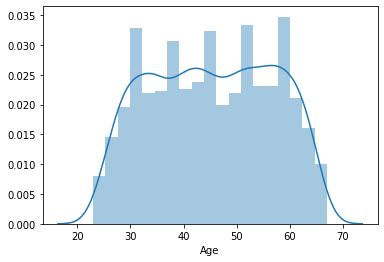

In [ ]:
#by seeing the graph it seems to have symmetric distribution
sns.distplot(train_df.Age);

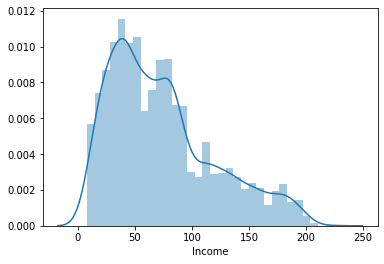

In [ ]:
#by seeing the graph it seems to have right skewed distribution
sns.distplot(train_df.Income);

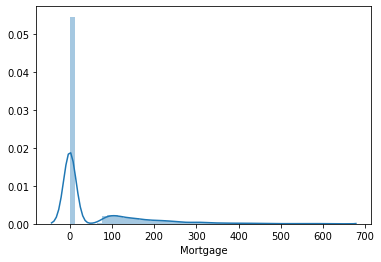

In [ ]:
#by seeing the graph it seems to be highly skewed
sns.distplot(train_df.Mortgage);

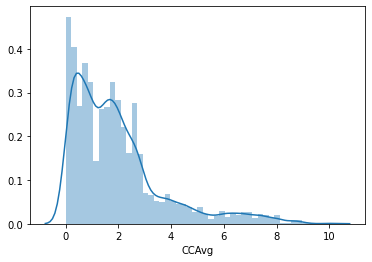

In [ ]:
#by seeing the graph it seems to have right skewed distribution
sns.distplot(train_df.CCAvg);

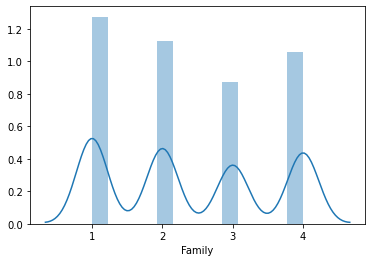

In [ ]:
sns.distplot(train_df.Family);

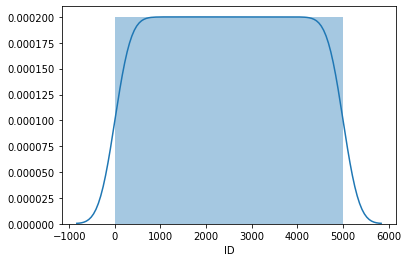

In [ ]:
sns.distplot(train_df.ID);

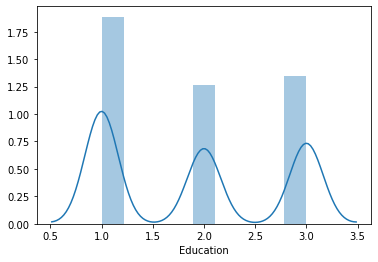

In [ ]:
sns.distplot(train_df.Education);

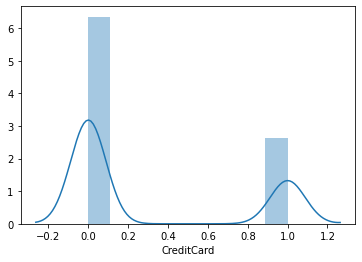

In [ ]:
sns.distplot(train_df.CreditCard);

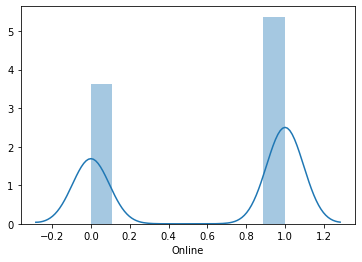

In [ ]:
sns.distplot(train_df.Online);

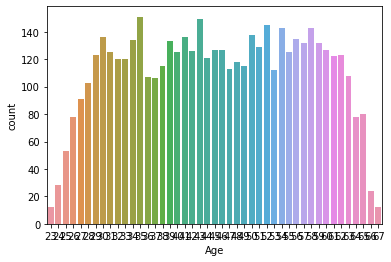

In [ ]:
sns.countplot(train_df.Age);

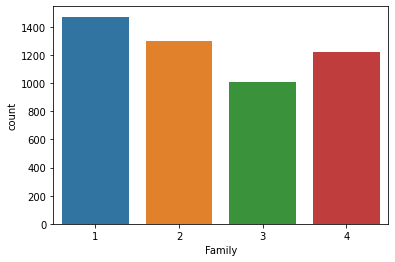

In [ ]:
sns.countplot(train_df.Family);

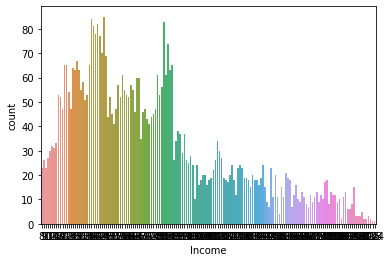

In [ ]:
sns.countplot(train_df.Income);

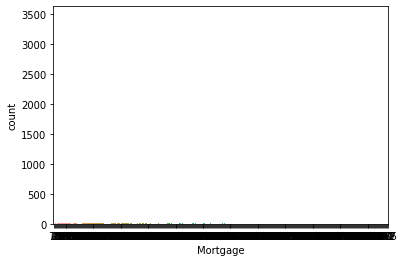

In [ ]:
sns.countplot(train_df.Mortgage);

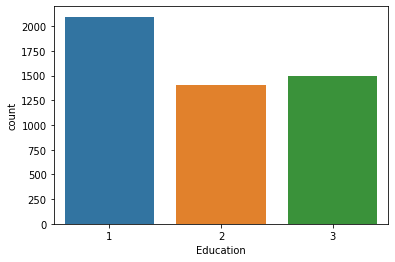

In [ ]:
sns.countplot(train_df.Education);

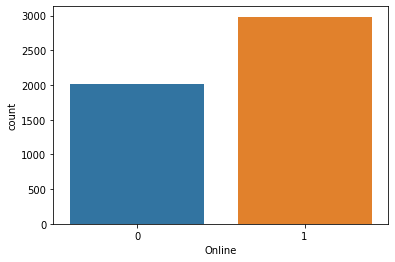

In [ ]:
sns.countplot(train_df.Online);

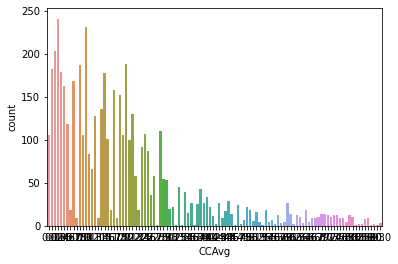

In [ ]:
sns.countplot(train_df.CCAvg);

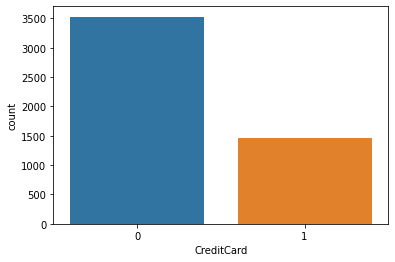

In [ ]:
sns.countplot(train_df.CreditCard);

BIVARIATE ANALYSIS

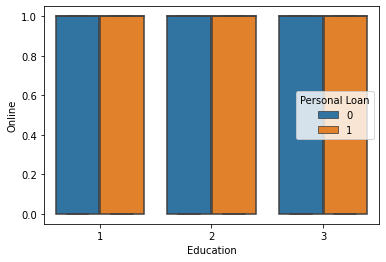

In [ ]:
sns.boxplot(x='Education',y='Online',hue='Personal Loan',data=train_df);

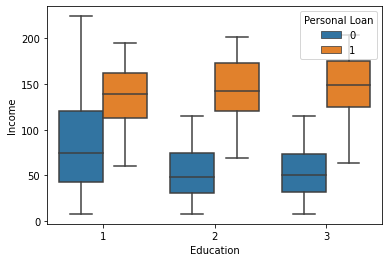

In [ ]:
#it seems to be that the customers who have more income are granted loan across each education level 
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=train_df);

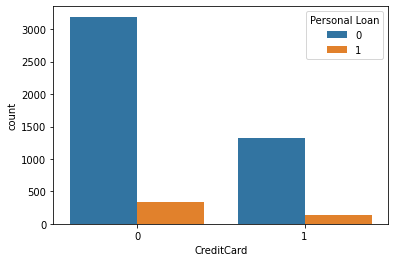

In [ ]:
sns.countplot(x="CreditCard",data=train_df,hue="Personal Loan");

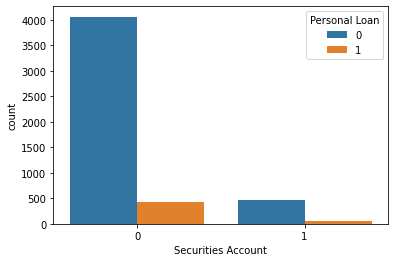

In [ ]:
#majority of people having securities account don't have personal loan
sns.countplot(x="Securities Account",data=train_df,hue="Personal Loan");

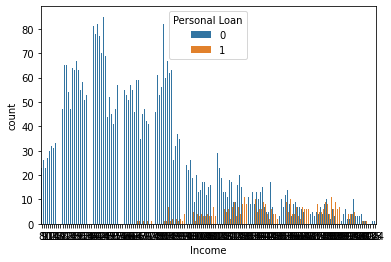

In [ ]:
sns.countplot(x="Income", data=train_df,hue="Personal Loan")

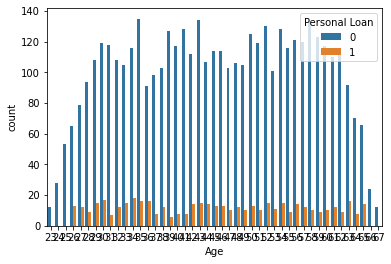

In [ ]:
#from this its clear that people have availed the loan
sns.countplot(x="Age", data=train_df,hue="Personal Loan")

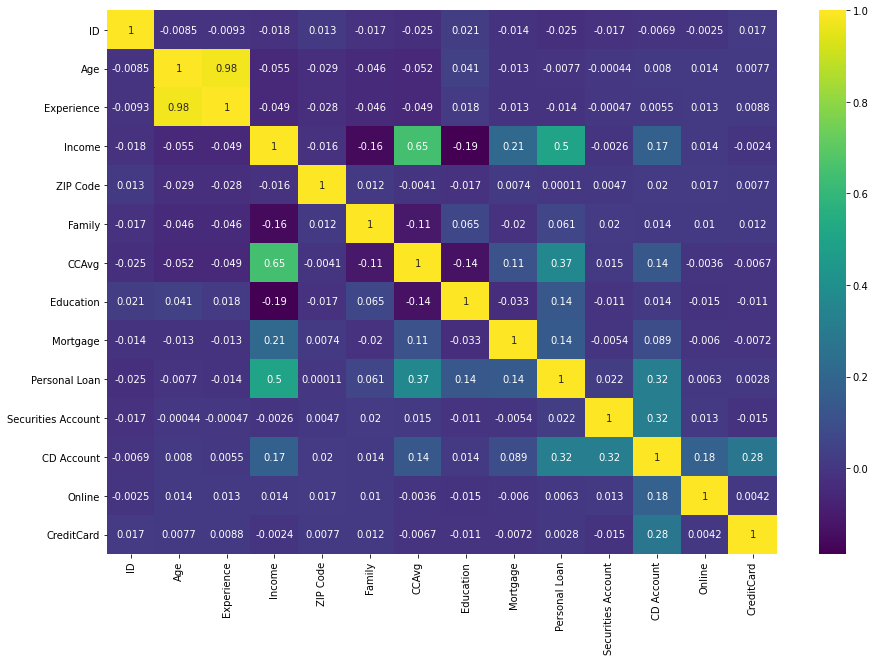

In [ ]:
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(train_df.corr(),cmap='viridis',annot=True);

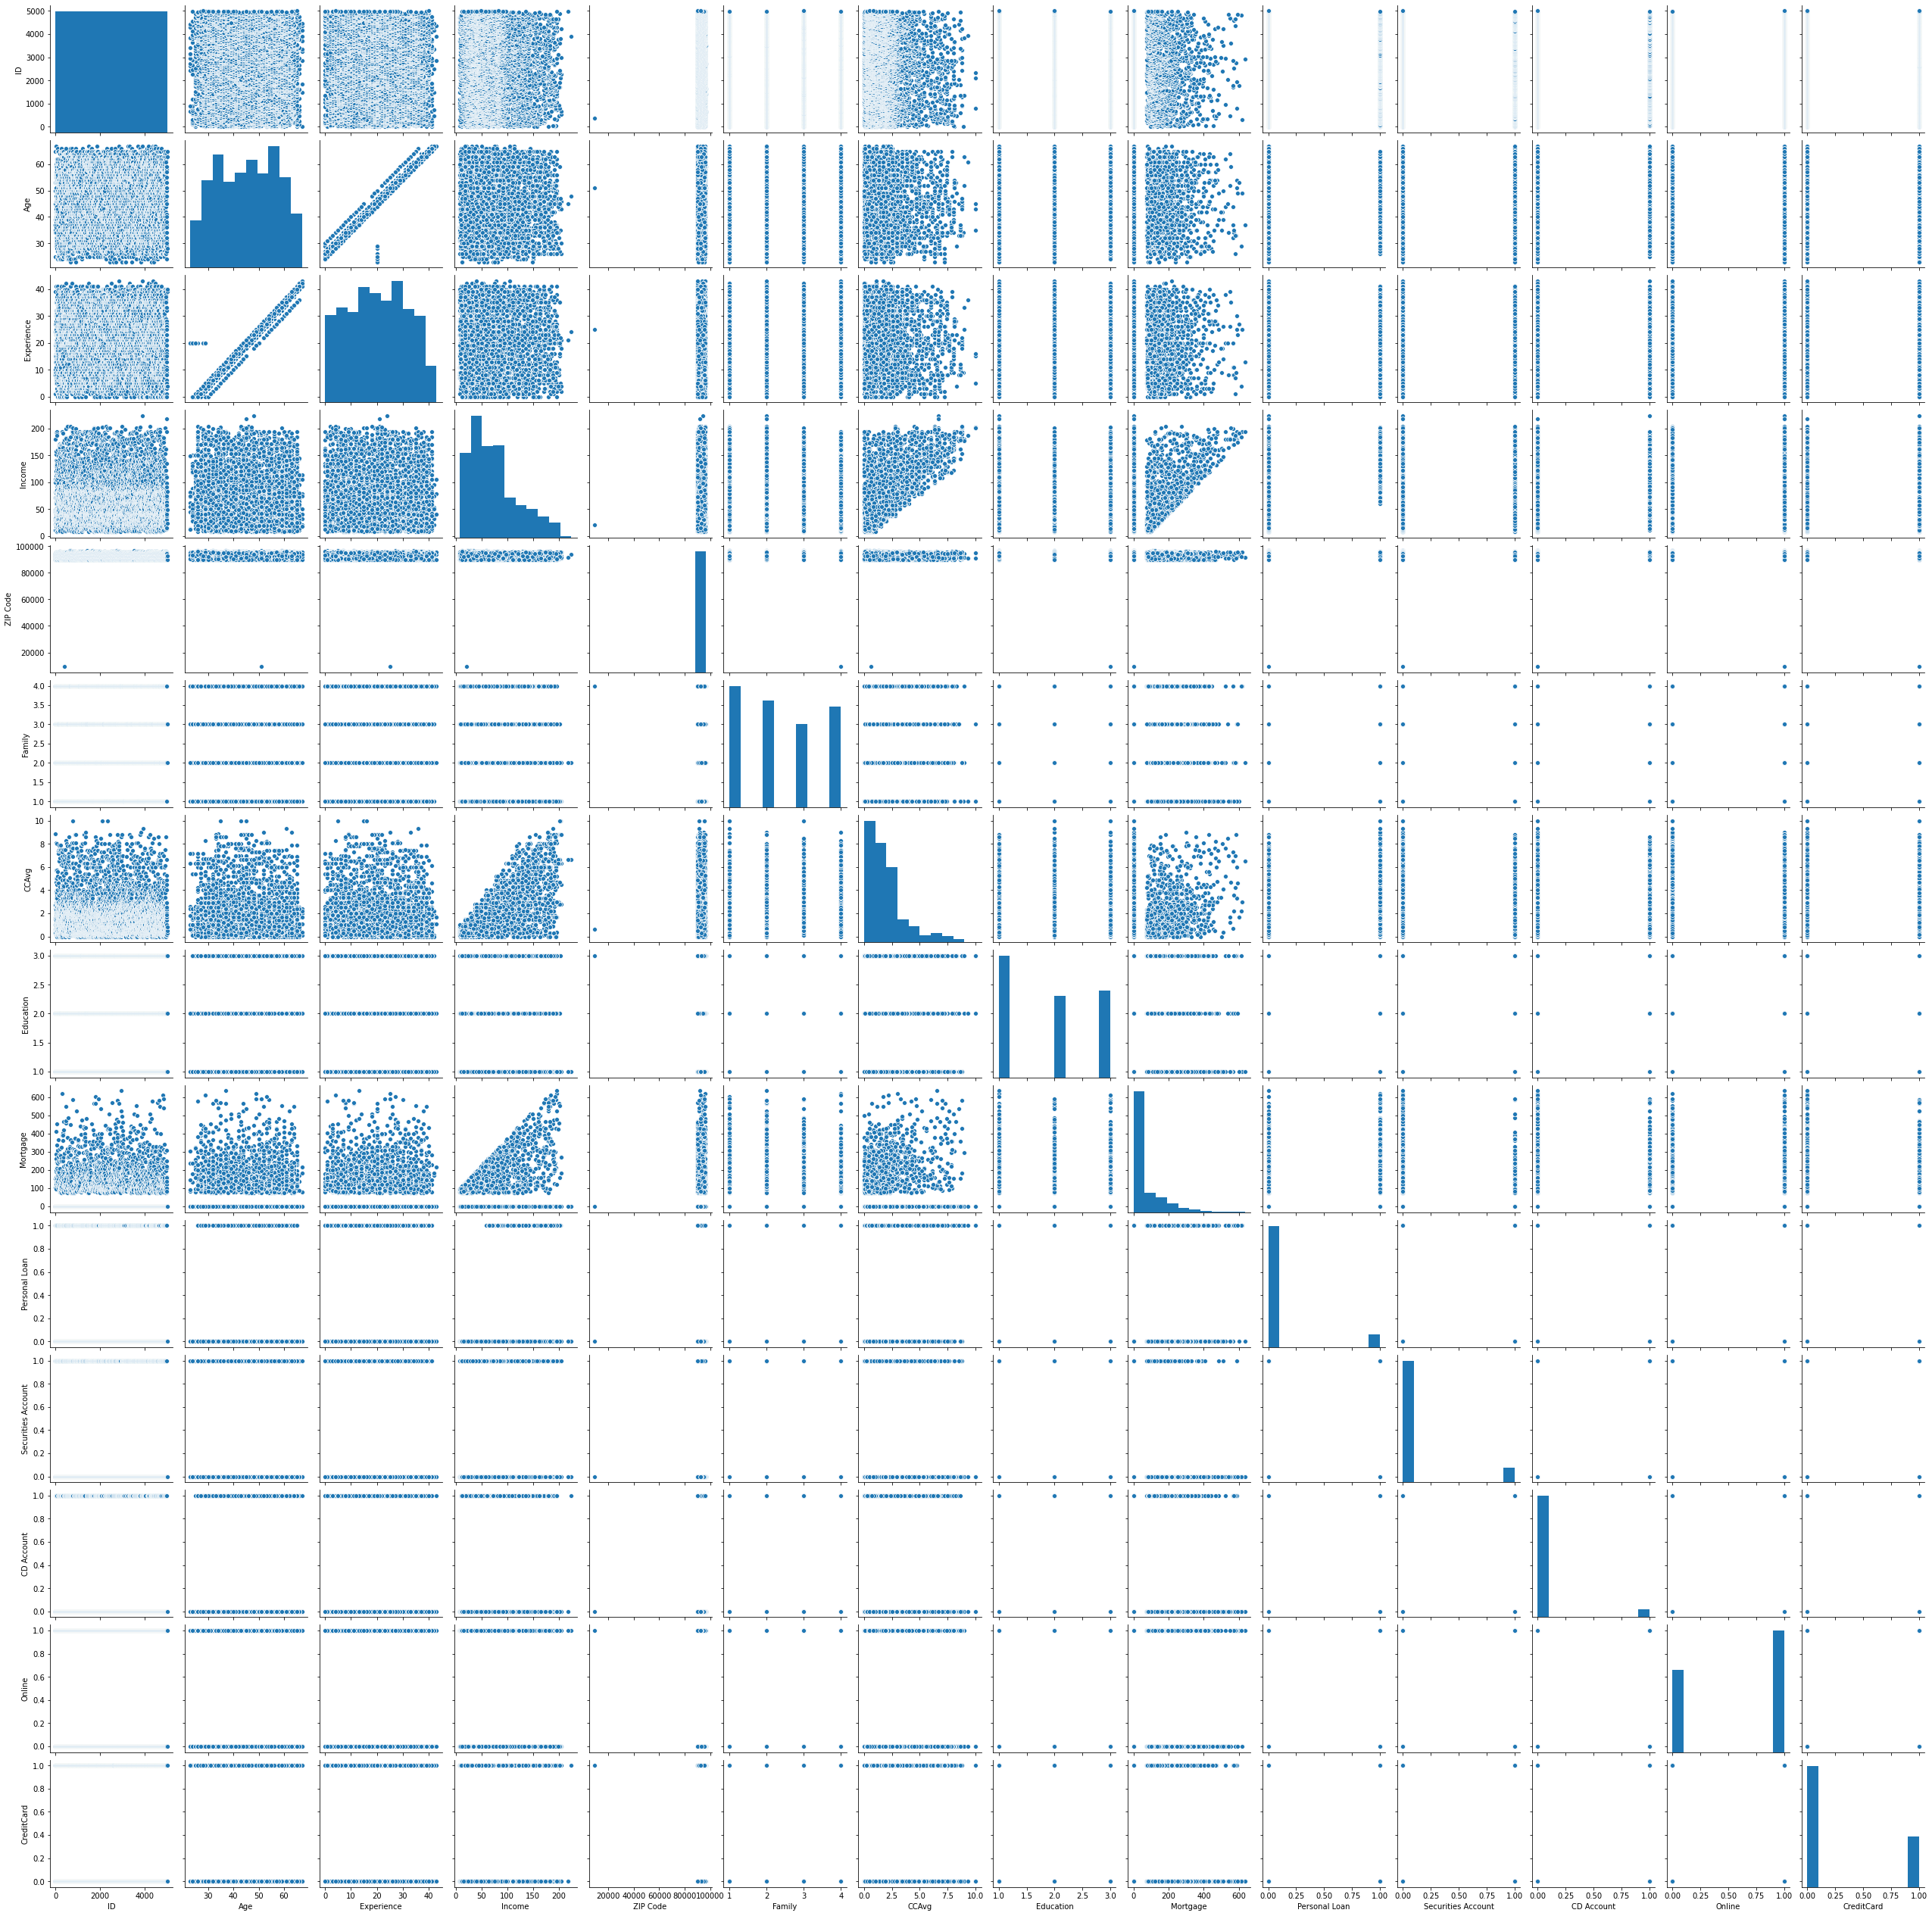

In [ ]:
sns.pairplot(train_df)

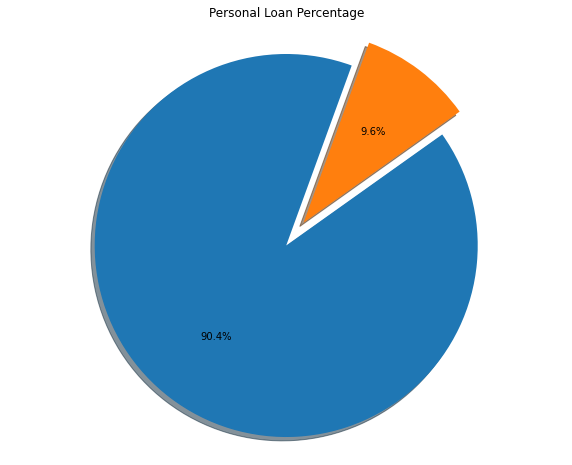

In [ ]:
#pie chart depicting that 9.6% people avail loan
DF=pd.DataFrame(train_df['Personal Loan'].value_counts()).reset_index()
DF.columns=['Labels','Personal Loan']
fig1,ax1=plt.subplots(figsize=(10,8))
explode=(0,0.15)
ax1.pie(DF['Personal Loan'],explode=explode,autopct='%1.1f%%',shadow=True,startangle=70)
ax1.axis('equal')
plt.title('Personal Loan Percentage')
plt.show()

In [ ]:
#setting data except Loan in one var and in one
data_X = train_df.loc[:, train_df.columns != "Personal Loan"]
data_Y = train_df[["Personal Loan"]]

In [ ]:
data_X.shape,data_Y.shape

((5000, 13), (5000, 1))

In [ ]:
data_X.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1


TRANSFORMATIONS FOR THE FEATURE VARIABLES

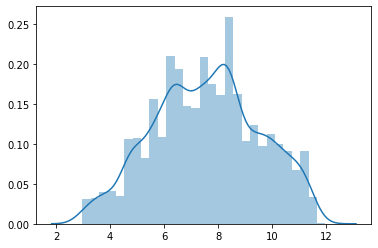

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(data_X["Income"].values.reshape(-1,1))
temp = pt.transform(data_X["Income"].values.reshape(-1,1))
sns.distplot(temp);

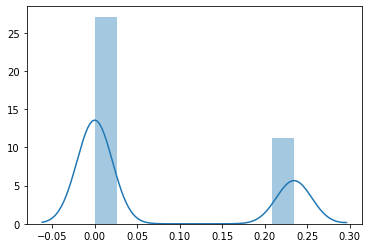

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(data_X["CreditCard"].values.reshape(-1,1))
temp = pt.transform(data_X["CreditCard"].values.reshape(-1,1))
sns.distplot(temp);

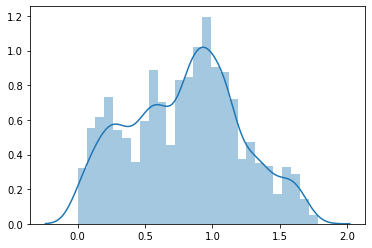

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(data_X["CCAvg"].values.reshape(-1,1))
temp = pt.transform(data_X["CCAvg"].values.reshape(-1,1))
sns.distplot(temp);

In [ ]:
data_X["Mortgage_Int"] = pd.cut(data_X["Mortgage"],
                                bins=[0,100,200,300,400,500,600,700],
                                labels=[0,1,2,3,4,5,6],
                                include_lowest=True)
data_X.drop("Mortgage",axis=1,inplace=True)

In [ ]:
data_X.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,1,25,1,49,91107,4,1.6,1,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,1,0


In [ ]:
data_X.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
4995,4996,29,3,40,92697,1,1.9,3,0,0,1,0,0
4996,4997,30,4,15,92037,4,0.4,1,0,0,1,0,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,1,0,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,1,1,0


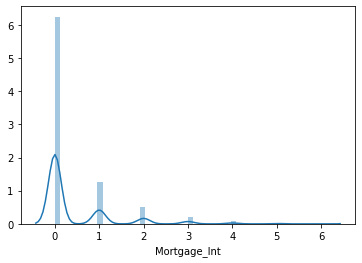

In [ ]:
sns.distplot(data_X.Mortgage_Int)

SPLITTING THE DATA

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(data_X, data_Y, test_size =0.3, stratify = data_Y, random_state=0)

In [ ]:
print(train_X.shape, test_X.shape, train_Y.shape, test_X.shape)

(3500, 13) (1500, 13) (3500, 1) (1500, 13)


NOW USING DIFFERENT PREDICTION MODELS

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score,plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

FOR LOGISTIC REGRESSION

In [ ]:
log_reg = LogisticRegression(C=1.0, max_iter=1000)
log_reg.fit(train_X, train_Y)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
class_name = ['will not take loan', 'take loan']

Training Accuracy: 0.91
Testing Accuracy: 0.91
Precision: 0.55
Recall: 0.34


Text(0.5, 1.0, 'Precision-Recall Curve for Logistic Regression')

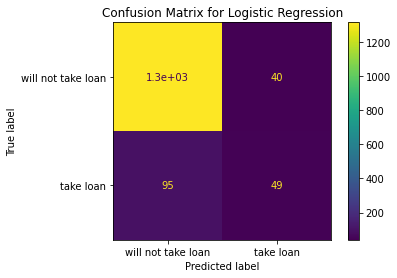

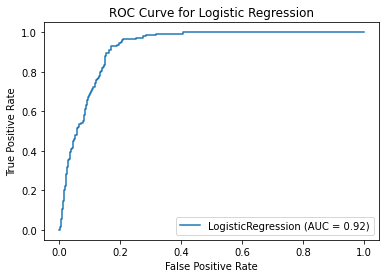

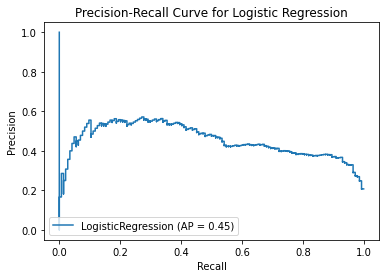

In [ ]:
train_score = log_reg.score(train_X, train_Y)
print('Training Accuracy:', train_score.round(2))
test_score = log_reg.score(test_X, test_Y)
print('Testing Accuracy:', test_score.round(2))
#used for prediction
Y_pred_logi = log_reg.predict(test_X)

precision_logi = precision_score(test_Y, Y_pred_logi, labels=class_name).round(2)
print('Precision:', precision_logi)
recall_logi = recall_score(test_Y, Y_pred_logi).round(2)
print('Recall:', recall_logi)

plot_confusion_matrix(log_reg, test_X, test_Y, display_labels=class_name)
plt.title('Confusion Matrix for Logistic Regression')

plot_roc_curve(log_reg, test_X, test_Y)
plt.title('ROC Curve for Logistic Regression')

plot_precision_recall_curve(log_reg, test_X, test_Y)
plt.title('Precision-Recall Curve for Logistic Regression')

FOR RANDOM FOREST

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=7,n_jobs=-1, random_state=1 )
rfc.fit(train_X, train_Y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

Training Accuracy: 0.99
Testing Accuracy: 0.99
Precision: 1.0
Recall: 0.85


Text(0.5, 1.0, 'Precision-Recall Random Forest Classifier')

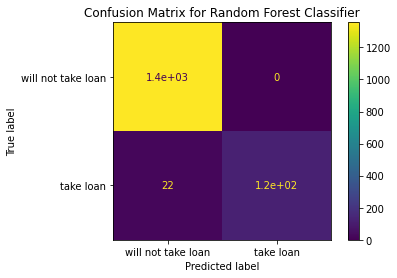

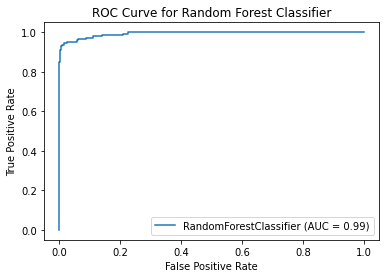

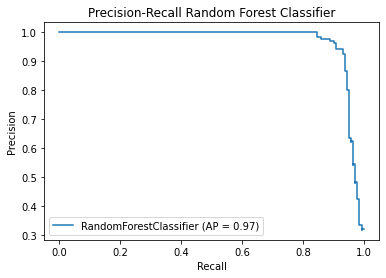

In [ ]:
train_score = rfc.score(train_X, train_Y)
print('Training Accuracy:', train_score.round(2))
test_score = rfc.score(test_X, test_Y)
print('Testing Accuracy:', test_score.round(2))

Y_pred_rf = rfc.predict(test_X)

precision_rf = precision_score(test_Y, Y_pred_rf, labels=class_name).round(2)
print('Precision:', precision_rf)
recall_rf = recall_score(test_Y, Y_pred_rf).round(2)
print('Recall:', recall_rf)

plot_confusion_matrix(rfc, test_X, test_Y, display_labels=class_name)
plt.title('Confusion Matrix for Random Forest Classifier')

plot_roc_curve(rfc, test_X, test_Y)
plt.title('ROC Curve for Random Forest Classifier')

plot_precision_recall_curve(rfc, test_X, test_Y)
plt.title('Precision-Recall Random Forest Classifier')


FOR DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(train_X, train_Y)
Y_pred=dtc.predict(test_X)

Training Accuracy: 1.0
Testing Accuracy: 0.98
Precision: 0.91
Recall: 0.9


Text(0.5, 1.0, 'Precision-Recall Decision Tree Classifier')

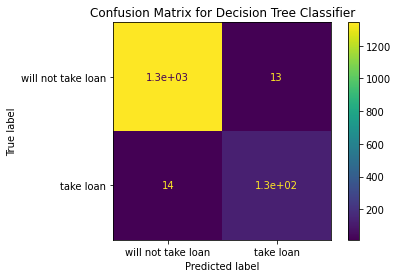

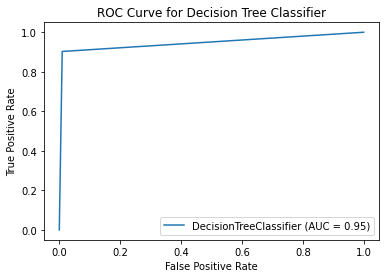

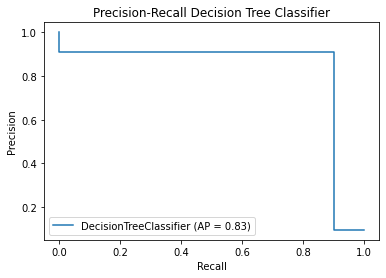

In [ ]:
train_score = dtc.score(train_X, train_Y)
print('Training Accuracy:', train_score.round(2))
test_score = dtc.score(test_X, test_Y)
print('Testing Accuracy:', test_score.round(2))

precision_dt = precision_score(test_Y, Y_pred, labels=class_name).round(2)
print('Precision:', precision_dt)
recall_dt = recall_score(test_Y, Y_pred).round(2)
print('Recall:', recall_dt)

plot_confusion_matrix(dtc, test_X, test_Y, display_labels=class_name)
plt.title('Confusion Matrix for Decision Tree Classifier')

plot_roc_curve(dtc, test_X, test_Y)
plt.title('ROC Curve for Decision Tree Classifier')

plot_precision_recall_curve(dtc, test_X, test_Y)
plt.title('Precision-Recall Decision Tree Classifier')

FOR K-NEAREST NEIGHBOR

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k= KNeighborsClassifier(n_neighbors= 15,weights ='uniform',metric='euclidean')
k.fit(train_X,train_Y)
Y_pred=k.predict(test_X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Training Accuracy: 0.9
Testing Accuracy: 0.9
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Precision-Recall Decision Tree Classifier')

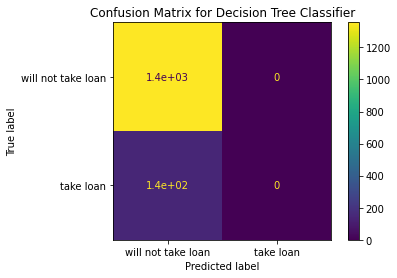

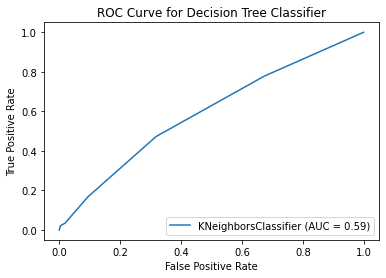

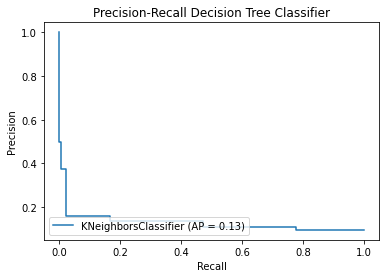

In [ ]:
train_score = k.score(train_X, train_Y)
print('Training Accuracy:', train_score.round(2))
test_score = k.score(test_X, test_Y)
print('Testing Accuracy:', test_score.round(2))

precision_dt = precision_score(test_Y, Y_pred, labels=class_name).round(2)
print('Precision:', precision_dt)
recall_dt = recall_score(test_Y, Y_pred).round(2)
print('Recall:', recall_dt)

plot_confusion_matrix(k, test_X, test_Y, display_labels=class_name)
plt.title('Confusion Matrix for Decision Tree Classifier')

plot_roc_curve(k, test_X, test_Y)
plt.title('ROC Curve for Decision Tree Classifier')

plot_precision_recall_curve(k, test_X, test_Y)
plt.title('Precision-Recall Decision Tree Classifier')


BUSINESS UNDERSTANDING OF THE MODEL

- Random forest classification is giving more accuracy as compared to other models

- From the pie chart it is clear that 9.6% from the total people availed loan.

- When we described the model so there negative values in the dataset, so we replaced the negative values to get the more accuracy.

- From the bivariate analysis it is clear that customers who have more income have been granted loan across each education level.

- Also it is analysed that customers having securities account don't have personal loan.

- Also from the analysis it is clear that customers have availed the loan.

- Also we analysed more about the data by performing various functions so that we can get more clearity about the data.

- So this is the analysis of the model.